# Reinforcement Learning Games

Import libraries:

In [49]:
import numpy as np
import tensorflow as tf
import gym
import matplotlib.pyplot as plt
% matplotlib notebook

First, let's see how a basic game play with random action choice looks like

In [2]:
env = gym.make('Pendulum-v0')           # Choose a game to create environment
env.reset()                             # Reset game
for _ in range(200):
    env.render()                        # Render game
    env.step(env.action_space.sample()) # Play a step chosen out of action_space
    
env.close()                             # close envirenment

What is kind of actions do we have?

In [5]:
env.action_space

Box(1,)

This is a 1D box, i.e. some range of continuous values over 1D axis.
What is the range of values available for actions?

In [8]:
print(env.action_space.high)
print(env.action_space.low)

[2.]
[-2.]


We can do the same for observations:

In [10]:
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Box(3,)
[1. 1. 8.]
[-1. -1. -8.]


Now we can run a few episodes and also save information about the observation and reward in each step:

In [11]:
num_steps = 200                  # Number steps to run
num_episodes = 20                # Number of game episodes to run

env = gym.make('CartPole-v0')    # Choose a game to create environment
temp = env.reset()                                        # Reset game and save first observation
obs = np.zeros((num_episodes, num_steps, len(temp)))      # allocate space for observations
reward = np.zeros((num_episodes, num_steps))              # allocate space for rewars

''' Run episodes '''
for ep in range(num_episodes): 
    obs[ep,0,:] = temp = env.reset() # Reset and save first observation
    
    ''' Run steps '''
    for t in range(1,num_steps):
        env.render()
        action = env.action_space.sample()   # Sample an action
        obs[ep,t], reward[ep,t], done, info = env.step(action)  # Take action and save observation, reward and done boolean
        if done: 
            print("Episode ended after {} steps".format(t+1))
            break

env.close()

Episode ended after 22 steps
Episode ended after 12 steps
Episode ended after 16 steps
Episode ended after 18 steps
Episode ended after 24 steps
Episode ended after 13 steps
Episode ended after 25 steps
Episode ended after 28 steps
Episode ended after 25 steps
Episode ended after 30 steps
Episode ended after 17 steps
Episode ended after 42 steps
Episode ended after 15 steps
Episode ended after 14 steps
Episode ended after 28 steps
Episode ended after 17 steps
Episode ended after 19 steps
Episode ended after 26 steps
Episode ended after 21 steps
Episode ended after 18 steps


For CartPole, the action space is Descrete, and has a size of 2 which means an action is either 0 or 1

In [20]:
print(env.action_space)
print(env.action_space.n)

Discrete(2)
2


Here is a nice way to figure out what action 1 does:

In [21]:
env.reset()
for _ in range(60):
    env.render()
    env.step(1)
    
env.close()

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


So, this moves the cart to the right. Obviously, 0 moves the cart to the left...

In [29]:
gym.envs.registry.all()

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v2), EnvSpec(BipedalWalkerHardcore-v2), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v2), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(Hopper-v2), EnvSpec(Swimmer-v2), EnvSpec(Walker2d-v2), EnvSpec(Ant-v2), EnvSpec(Hum

In [45]:
env = gym.make('CarRacing-v0')           # Choose a game to create environment
obs1 = env.reset()                             # Reset game
for _ in range(200):
    env.render()                        # Render game
    r = env.step(env.action_space.sample()) # Play a step chosen out of action_space
    
env.close()                             # close envirenment

Track generation: 1082..1357 -> 275-tiles track


In [35]:
env.action_space

Box(3,)

In [51]:
env.action_space.high

array([1., 1., 1.], dtype=float32)

In [52]:
env.action_space.low

array([-1.,  0.,  0.], dtype=float32)

In [36]:
env.observation_space

Box(96, 96, 3)

In [46]:
obs1 = r[0]

<IPython.core.display.Javascript object>


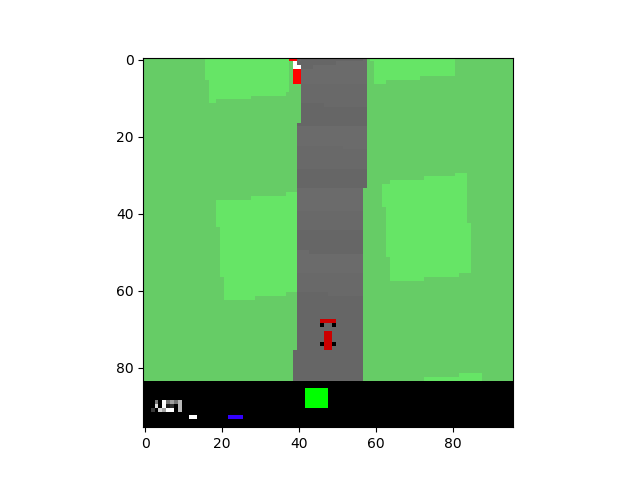

In [50]:
plt.imshow(obs1)